In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_feat
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(gamma='auto')    

In [12]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predictions = model.predict(X_test)

# Prediction and Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions) 

print(cm)
print('\n')
print(classification_report(y_test,predictions))

[[  0  67]
 [  0 121]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.64      1.00      0.78       121

   micro avg       0.64      0.64      0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188



/Users/frankie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/frankie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/frankie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


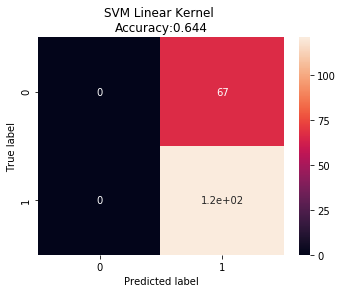

In [16]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[0.1, 1 ,10,100,100],
             'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid = GridSearchCV(SVC(),param_grid,verbose=3,cv=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .................. C=0.1, gamma=1, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.1, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ............... C=0.1, gamma=0.01, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .............. C=0.1, gamma=0.001, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ............... C=100, gamma=0.001, score=0.921875, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ...... C=100, gamma=0.001, score=0.905511811023622, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ...... C=100, gamma=0.001, score=0.873015873015873, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .............. C=100, gamma=0.0001, score=0.953125, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9212598425196851, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9206349206349206, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [22]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
grid_predictions = grid.predict(X_test)

In [24]:
grid_cm = confusion_matrix(y_test,grid_predictions)

print(cm)
print('\n')
print(classification_report(y_test,grid_predictions))

[[  0  67]
 [  0 121]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



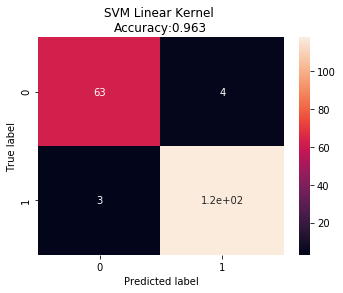

In [25]:
plt.figure(figsize=(5.5,4))
sns.heatmap(grid_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, grid_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()